In [1]:
from pylab import *
from brian2 import *
import time

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'serif', 
                     'font.serif':['Computer Modern']})

# Computational Dynamics

Is the brain a computer? If the brain is not a computer, then what is it?

Turing and von Neumann modelled the computer on the mechanical thought processes going on in their heads when they performed mathematical calculations.

What makes something a computer? Is there a defining boundary between computational systems and those that are not?

Is physics itself performing computation? Is the universe a computer simulation?


- math
    - differential equations
    - exponentials, oscillations, stability, chaos
    - chaos + missing information = randomness
- physics
    - all physics equations are related to differential equations
    - Equilibrium equations, pv=nrt, are stable points
    

## The math of physics

To really understand the nature of computation, we must look closely at the physics of the well-known computers we use everyday.

Computers are really electronic devices. Of course at the lowest level, electrons are governed by the equations of quantum mechanics. 

But these equations are not necessary to understand the general physics of electronics. Rather, Maxwell's equations of electricity are used. 

Like the shroedinger equation and the other equations of quantum mechanics, Maxwell's equations are in the class of differential equations. 

In fact, almost everything in physics is related to differential equations and dynamical systems. 

The formalism of computational dynamics uses differential equations as the heart of all physical systems. Importantly, the differential equations of physics can often be reduced or simplified into what we call first-order differential equations.

A first order differential equaiton is of the form:

$$
\frac{d}{dt} x = f(x)
$$

Here, $x$ is the state variable and $f(x)$ is some function that is dependent on the state variable.

We can make a system of differential equation, that we can write in vector form:

$$
\frac{d}{dt} \mathbf{x} = f(\mathbf{x})
$$

where the bold $\mathbf{x}$ indicates a vector, and thus the equation describes a change in all of the vector elements based on a function that is determined by the state vector. All of the information contained in the system is described by the elements of the vector $\mathbf{x}$.


## Newton and first-order Diff EQs

Force equals mass times acceleration.

$$
F = ma 
$$

One of the most famous and important equations in physics is Newton's law of motion. 

Like everything in physics this can be described by differential equations. Acceleration is the derivative of velocity, and velocity is the derivative of acceleration. 

So then Newton's law is a second order differential equation:

$$
m \frac{d^2}{dt^2} x = F
$$

But what do we do with second order derivatives? Like everything else we can reconstruct this equation into first order differential equations. This is done by having a system of two equations, where we can consider velocity as one of the state variables.

$$
v = \frac{d}{dt} x \\
a = \frac{d}{dt} v
$$

Then we can rewrite as:

$$
m \frac{d}{dt} v = F \\
\frac{d}{dt} x = v
$$

This can be done for any order of differential equation. The higher derivatives can be replaced with a state variable to create first-order differential equations.



## Dynamical systems

Now that we have some ideas about the relationships between the laws of physics and differential equations, we can focus more on the mathematics of differential equations. 

This field is known as dynamical systems, when there are many first-order differential equations that are interacting.

In dynamical systems, there are special points known as critical points. Often dynamics can be simplified and approximated by taking note of the critical points and their properties. 

As an example, lets continue with Newton's equations but add in the spring equation. Here, a mass is attached to a spring which applies a force depending on how much the spring is stretched.

$$
ma = F = -kx - lv
$$

Here the spring equation is described by mass ($m$), position ($x$), velocity ($v$), the spring constant ($k$) and the damping force or friction ($l$). 

So then if the position ($x$) of the object is at $0$ then there is no force due to the spring. Lets rewrite this as first order diff eqs:

$$
m \frac{d}{dt} v = -kx - lv \\
\frac{d}{dt} x = v
$$




In [3]:
from brian2 import *

num_objects = 1

m = 1 * kilogram
k = 2 * kilogram / second / second
l = 0.5 * kilogram / second

eqs = Equations('''
dv/dt = (-k * x - l*v) / m : meter / second
dx/dt = v : meter
''')

In [4]:
spring_objects = NeuronGroup(num_objects, eqs, method='euler')
spring_objects.x = 10 * meter

monitor = StateMonitor(spring_objects, True, record=True)

spring_net = Network()
spring_net.add(spring_objects)
spring_net.add(monitor)

spring_net.store('init')

In [5]:
spring_net.run(20 * second)

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


Text(0.5, 0, 'Time (s)')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


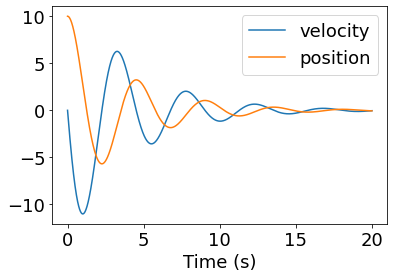

In [6]:
plot(monitor.t, monitor.v[0], label='velocity')
plot(monitor.t, monitor.x[0], label='position')
legend()
xlabel('Time (s)')

Another way to visualize the dyamics is to look at the phase plot.

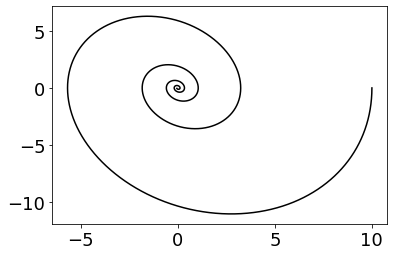

In [7]:
plot(monitor.x[0], monitor.v[0], 'k')

## Stability

In the spring system of equations we have what is known as a critical point at $(0,0)$. Critical points are defined by where the differential equation evaluates to 0, i.e. $f(\mathbf{x}) = 0$. These are also called fixed points.

For the spring system, the critical point is known as a stable critical point. This means that the dynamics of the system push towards the critical point, and any perturbation away from the critical point leads to the system returning to the stable fixed point. 

However, there are also unstable fixed points, which have the opposite property -- any perturbation away from the fixed point leads to the system getting further away. 

Many systems of differential equations are characterized by the properties of their fixed points. 

What's useful is then that systems of non-linear equations can be understood based on their fixed point properties as well. This often one of the best ways to make sense of systems of differential equations. 

So, we can see that the behavior of a pendulum is quite similar to the behavior of a spring, even though the pendulum equation is non-linear. 

Lets replace the position of the mass on the spring with the angle of a mass on a pendulum. The angle of $0^\circ$ is defined by the pendulum being pointed downwards. 

The horizontal force on the pendulum is then dependent upon the angle of the pendulum:

$$
F = g sin(a)
$$

where $g$ is a constant to indicate the force of gravity.

Then the pendulum equation is quite similar, just replacing the units of meters with units of radians (which are unitless)

In [8]:
m = 1 * kilogram
g = 9.81 * meter / second / second
l = 0.5 / second
L1 = 1 * meter 

eqs = Equations('''
dv/dt = (-g / L1 * sin(a) - l*v)  : 1 / second
da/dt = v : 1
''')

In [9]:
pendulum_objects = NeuronGroup(num_objects, eqs, method='euler')
pendulum_objects.a = 20 / 360 * 2 * np.pi 

pend_monitor = StateMonitor(pendulum_objects, True, record=True)

pendulum_net = Network()
pendulum_net.add(pendulum_objects)
pendulum_net.add(pend_monitor)

pendulum_net.store('init')

In [10]:
pendulum_net.run(20 * second)

In [11]:
## just make sure our angles always wrap to between [-pi, pi]
def wrapToPi(angle):
    aa = angle % (2*np.pi)
    
    aa[aa > np.pi] -= 2*np.pi
    
    return aa

Text(0.5, 0, 'Time (s)')

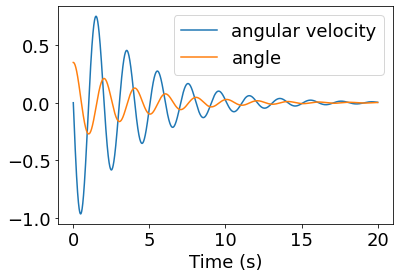

In [12]:
plot(pend_monitor.t, pend_monitor.v[0], label='angular velocity')
plot(pend_monitor.t, wrapToPi(pend_monitor.a[0]), label='angle')
legend()
xlabel('Time (s)')

so we can see that the pendulum and the spring are very similar. This is especially true because we can evaluate the property of the fixed point at $0^circ$ and at $0$ meters. 

This also holds because of the small angle approximation of the sin function. Generally if the angle is small, the sin fuction is close to the linear function and so the non-linearity can be ignored.

But with the pendulum there is also an unstable fixed point. Consider if we initialize the pendulum to exactly $180^\circ$, where the pendulum is upside down. Here we have a fixed point, since $sin(180^\circ) = 0$, but this fixed point is unstable.


In [13]:
pendulum_net.restore('init')

pendulum_objects.a = np.pi

In [14]:
pendulum_net.run(20 * second)

Text(0.5, 0, 'Time (s)')

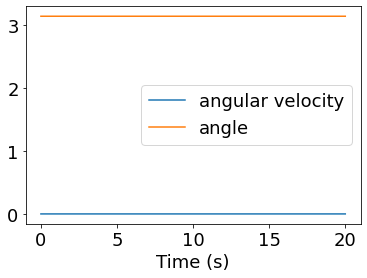

In [15]:
plot(pend_monitor.t, pend_monitor.v[0], label='angular velocity')
plot(pend_monitor.t, wrapToPi(pend_monitor.a[0]), label='angle')
legend()
xlabel('Time (s)')

Well then how about that for unstable? Of course the fixed point really is a fixed point if the evaluation is perfect and exact. Since this is a computer simulation, the computer does have to ultimately implement the equations with some precision, and in this case it is so precise that we can stay at the unstable fixed point. 

But lets look at what happens if we every so slightly perturb the system from this unstable fixed point.

In [16]:
pendulum_net.restore('init')

pendulum_objects.a = np.pi - 0.0001

In [17]:
pendulum_net.run(20 * second)

Text(0.5, 0, 'Time (s)')

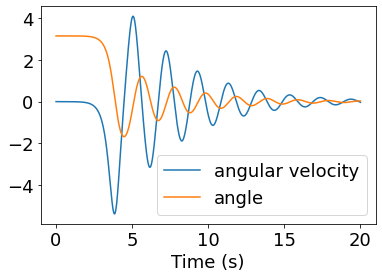

In [18]:
plot(pend_monitor.t, pend_monitor.v[0], label='angular velocity')
plot(pend_monitor.t, pend_monitor.a[0], label='angle')
legend()
xlabel('Time (s)')

Here we now see the unstable fixed point, where we initially there is very little change, but the dynamics pushes the pendulum away from this fixed point. The pendulum then falls into its oscillation and the system will then eventually approach the stable fixed point at the bottom. 

Another way to look at the dynamics is to visualize the state space. We can examine this two dimensional system as a plot of the state space over time.


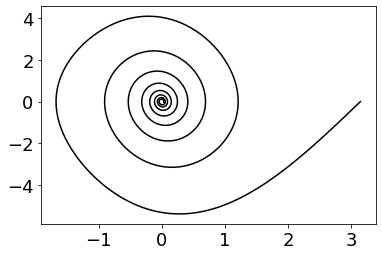

In [19]:
plot(pend_monitor.a[0], pend_monitor.v[0], 'k')

the fixed points of the system can be found from the "nullclines". These are the curves that are defined for where one of the differential equations evaluates to 0. There is then a nullcline for each variable in the system of differential equations. 

$$
da/dt = v = 0 -> v = 0
$$

$$
dv/dt = -g sin(a) - l v= 0 -> a = arcsin(-lv/g)
$$

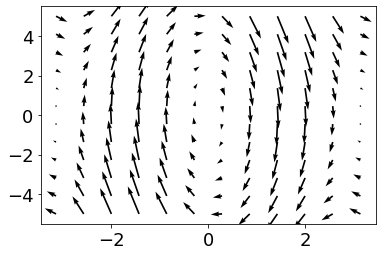

In [20]:
pha = np.linspace(-np.pi, np.pi, 12)
phv = np.linspace(-5, 5, 12) / second

phA, phV = np.meshgrid(pha, phv)

dphA = phV
dphV = -g/L1 *sin(phA) - l*phV

plt.quiver(phA, phV, dphA, dphV)

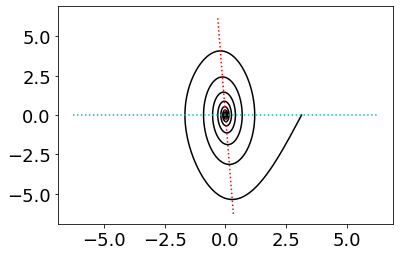

In [21]:
aspan = np.linspace(-2*np.pi, 2*np.pi, 200) 
vspan = np.linspace(-2*np.pi, 2*np.pi, 200) / second

vnull = 0 * aspan
anull = np.arcsin(-l*L1*vspan/g)

plot(pend_monitor.a[0], pend_monitor.v[0], 'k')
plot(aspan, vnull, ':c')
plot(anull, vspan, ':r')
# # the arcsin function repeats every pi
# for n in range(-1, 2):
#     plot(anull + n*np.pi, vspan, ':r')


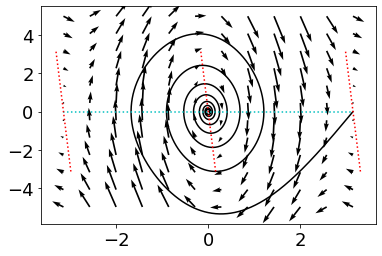

In [22]:
aspan = np.linspace(-np.pi, np.pi, 200) 
vspan = np.linspace(-np.pi, np.pi, 200) / second

vnull = 0 * aspan
anull = np.arcsin(-l*L1*vspan/g)

plt.quiver(phA, phV, dphA, dphV)

plot(pend_monitor.a[0], pend_monitor.v[0], 'k')
plot(aspan, vnull, ':c')

# the arcsin function repeats every pi
for n in range(-1, 2):
    plot(anull + n*np.pi, vspan, ':r')


## Chaos

When there are only two state variables in a dynamical system, there can only be two types of behavior, stability or instability. 

However, when there are more state variables, a new type of property can emerge, which is known as chaos. 

Chaos is a complicated beast, especially in the context of simulations on a computer. 

One idea behind a system with chaotic dynamics is that a small perturbation will cause the system to behave radically differently. 




ω1' = 	−g (2 m1 + m2) sin θ1 − m2 g sin(θ1 − 2 θ2) − 2 sin(θ1 − θ2) m2 (ω22 L2 + ω12 L1 cos(θ1 − θ2))
L1 (2 m1 + m2 − m2 cos(2 θ1 − 2 θ2))
ω2' = 	2 sin(θ1−θ2) (ω12 L1 (m1 + m2) + g(m1 + m2) cos θ1 + ω22 L2 m2 cos(θ1 − θ2))
L2 (2 m1 + m2 − m2 cos(2 θ1 − 2 θ2))


In [23]:
m1 = 1.0 * kilogram
m2 = 0.5 * kilogram

L1 = 1 * meter
L2 = 1 * meter

g = 9.81 * meter / second / second
l = 0.1 * kilogram / second

eqs = Equations('''
dv1/dt = (-g * (2*m1 + m2) * sin(a1) - m2 * g * sin(a1 - 2*a2) - 2 * sin(a1 - a2) * m2 * (v2**2 * L2 + v1**2 * L1 * cos(a1 - a2))) / (L1 * (2 * m1 + m2 - m2 * cos(2 * a1 - 2 * a2))) : 1 / second
da1/dt = v1 : 1
dv2/dt = (2 * sin(a1 - a2) * (v1**2 * L1 * (m1 + m2) + g * (m1 + m2) * cos(a1) + v2**2 * L2 * m2 * cos(a1 - a2))) / (L2 * (2 * m1 + m2 - m2 * cos(2 * a1 - 2 * a2))) : 1 / second
da2/dt = v2 : 1
''')

In [24]:
pendulum_objects = NeuronGroup(num_objects, eqs, method='euler')

pendulum_objects.a1 = 90 / 360 * 2 * np.pi 
pendulum_objects.a2 = 90 / 360 * 2 * np.pi
pend_monitor = StateMonitor(pendulum_objects, True, record=True)

pendulum_net = Network()


pendulum_net.add(pendulum_objects)
pendulum_net.add(pend_monitor)

pendulum_net.store('init')

In [25]:
pendulum_net.run(60 * second)

Text(0.5, 0, 'Time (s)')

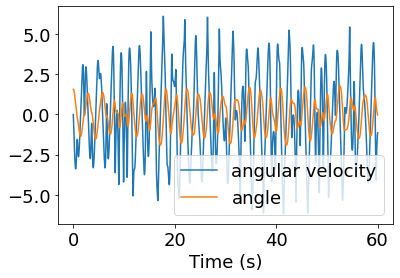

In [26]:
plot(pend_monitor.t, pend_monitor.v1[0], label='angular velocity')
plot(pend_monitor.t, pend_monitor.a1[0], label='angle')
legend()
xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

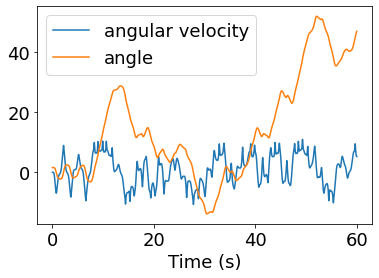

In [27]:
plot(pend_monitor.t, pend_monitor.v2[0], label='angular velocity')
plot(pend_monitor.t, pend_monitor.a2[0], label='angle')
legend()
xlabel('Time (s)')

In [28]:
from matplotlib.animation import FuncAnimation
from IPython import display

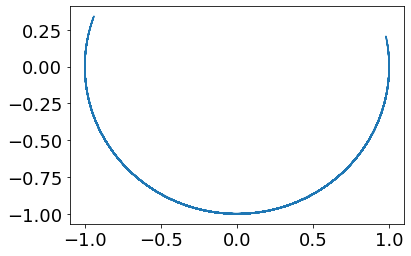

In [29]:
a1 = pend_monitor.a1[0][::200]
a2 = pend_monitor.a2[0][::200]

x1 = L1 * sin(a1)
y1 = -L1 * cos(a1)

plot(x1, y1)

In [30]:
a1.shape

(3000,)

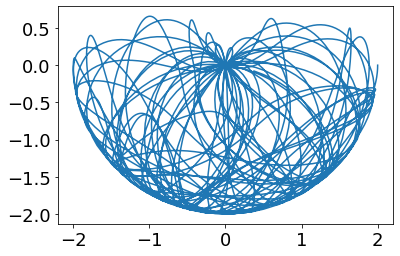

In [31]:

x2 = x1 + L1 * sin(a2)
y2 = y1 -L1 * cos(a2)

plot(x2, y2)

MovieWriter stderr:
dyld[84824]: Library not loaded: '/opt/homebrew/opt/libvmaf/lib/libvmaf.1.dylib'
  Referenced from: '/opt/homebrew/Cellar/ffmpeg/4.4.1_5/bin/ffmpeg'
  Reason: tried: '/opt/homebrew/opt/libvmaf/lib/libvmaf.1.dylib' (no such file), '/usr/local/lib/libvmaf.1.dylib' (no such file), '/usr/lib/libvmaf.1.dylib' (no such file), '/opt/homebrew/Cellar/libvmaf/3.0.0/lib/libvmaf.1.dylib' (no such file), '/usr/local/lib/libvmaf.1.dylib' (no such file), '/usr/lib/libvmaf.1.dylib' (no such file)



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/xn/hqbqng2d6nz8f1lcyd545kqr0000gn/T/tmpfbizb69_/temp.m4v']' died with <Signals.SIGABRT: 6>.

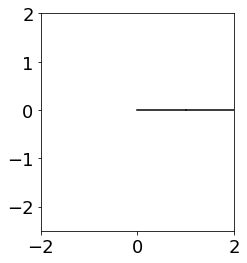

In [32]:
fh = figure()

def plot_pendulum(frame):
    cla()
    x1 = L1 * sin(a1[frame])
    y1 = -L1 * cos(a1[frame])
    
    x2 = x1 + L2 * sin(a2[frame])
    y2 = y1 - L2 * cos(a2[frame])
    
    plot([0, x1], [0, y1], 'k')
    plot([x1, x2], [y1, y2], 'k')

    
    ax = gca()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2.5, 2])
    ax.set_aspect('equal')
    
anim = FuncAnimation(fh, plot_pendulum, frames=1000, interval=20)  

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

In [ ]:
pendulum_net.restore('init')
pendulum_objects.a1 = 90 / 360 * 2 * np.pi 
pendulum_objects.a2 = 91 / 360 * 2 * np.pi

pendulum_net.run(60 * second)

In [ ]:
a1a = pend_monitor.a1[0][::200]
a2a = pend_monitor.a2[0][::200]

x1a = L1 * sin(a1a)
y1a = -L1 * cos(a1a)

plot(x1a, y1a)

In [ ]:

x2a = x1a + L1 * sin(a2a)
y2a = y1a -L1 * cos(a2a)

plot(x2a, y2a)

In [ ]:
fh = figure()

def plot_pendulum2(frame):
    cla()
    x1 = L1 * sin(a1[frame])
    y1 = -L1 * cos(a1[frame])
    
    x2 = x1 + L2 * sin(a2[frame])
    y2 = y1 - L2 * cos(a2[frame])
    
    plot([0, x1], [0, y1], 'k')
    plot([x1, x2], [y1, y2], 'k')
    
    x1a = L1 * sin(a1a[frame])
    y1a = -L1 * cos(a1a[frame])
    
    x2a = x1a + L2 * sin(a2a[frame])
    y2a = y1a - L2 * cos(a2a[frame])
    
    plot([0, x1a], [0, y1a], 'r')
    plot([x1a, x2a], [y1a, y2a], 'r')

    
    ax = gca()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2.5, 2])
    ax.set_aspect('equal')
    
anim = FuncAnimation(fh, plot_pendulum2, frames=1000, interval=20)  

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

## Emergence in physics

One branch of physics, known as statistical mechanics, has developed many important equations for understanding energy. 

For instance, temperature is a statistical quantity related to the average kinetic energy of all molecules in a system. 

Physicists understood particles each have some momentum and kinetic energy. Critically, particles, like molecules in the air, are interacting and bouncing off of each other. 

These interactions are chaotic. 






